In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gambler's problem parameters
goal = 100
ph_values = [0.25, 0.55]
discount_factor = 1.0  # No discounting in this problem
tolerance = 1e-9  # Convergence tolerance

#### Defining value iteration function

In [3]:
def value_iteration(ph):
    V = np.zeros(goal + 1)
    policy = np.zeros(goal + 1, dtype=int)

    while True:
        delta = 0
        for s in range(1, goal):  # Skip 0 and 100 as they are terminal states
            v = V[s]
            max_value = 0
            for a in range(1, min(s, goal - s) + 1):  # Possible actions
                win_value = ph * (V[s + a] if s + a < goal else 1)  # Win value
                loss_value = (1 - ph) * V[s - a]  # Loss value
                action_value = win_value + loss_value
                if action_value > max_value:
                    max_value = action_value
            V[s] = max_value
            delta = max(delta, abs(v - V[s]))

        if delta < tolerance:
            break

    # Determine optimal policy
    for s in range(1, goal):
        max_value = 0
        for a in range(1, min(s, goal - s) + 1):
            win_value = ph * (V[s + a] if s + a < goal else 1)  # Win value
            loss_value = (1 - ph) * V[s - a]  # Loss value
            action_value = win_value + loss_value
            if action_value > max_value:
                max_value = action_value
                policy[s] = a

    return V, policy

#### Value Iteration for both ph values

In [4]:
value_functions = []
policies = []
for ph in ph_values:
    value_function, policy = value_iteration(ph)
    value_functions.append(value_function)
    policies.append(policy)


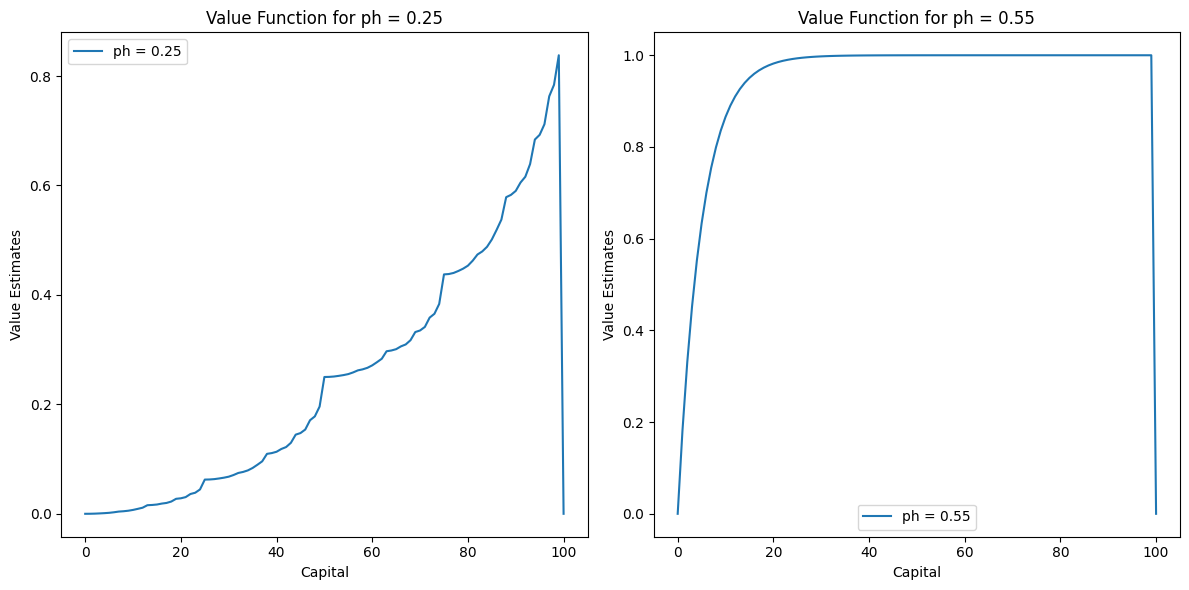

In [5]:
plt.figure(figsize=(12, 6))

for i, ph in enumerate(ph_values):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(goal + 1), value_functions[i], label=f'ph = {ph}')
    plt.xlabel('Capital')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Function for ph = {ph}')
    plt.legend()

plt.tight_layout()
plt.show()